In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [11]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Automobile_data.csv")
df=df.iloc[:,[2,3,4,5,6,7,8,10,11,12,13,14,15,16,21,23,24,25]]
df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,111,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,111,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,2823,ohcv,six,152,154,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,2337,ohc,four,109,102,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,2824,ohc,five,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,2952,ohc,four,141,114,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,188.8,68.8,55.5,3049,ohc,four,141,160,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,3012,ohcv,six,173,134,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,188.8,68.9,55.5,3217,ohc,six,145,106,26,27,22470


In [12]:
df.shape

(205, 18)

In [13]:
df.columns 

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [14]:
df.replace("?", np.nan, inplace = True)

In [15]:
df.isnull().sum()  #Will show you null count for each column

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
horsepower          2
city-mpg            0
highway-mpg         0
price               4
dtype: int64

In [16]:
# fill missing values
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df["num-of-doors"].replace(np.nan, "four", inplace=True)
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Correct data format
df[["price"]] = df[["price"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("float")

In [19]:
df.dtypes

make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
length              float64
width               float64
height              float64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
horsepower          float64
city-mpg              int64
highway-mpg           int64
price               float64
dtype: object

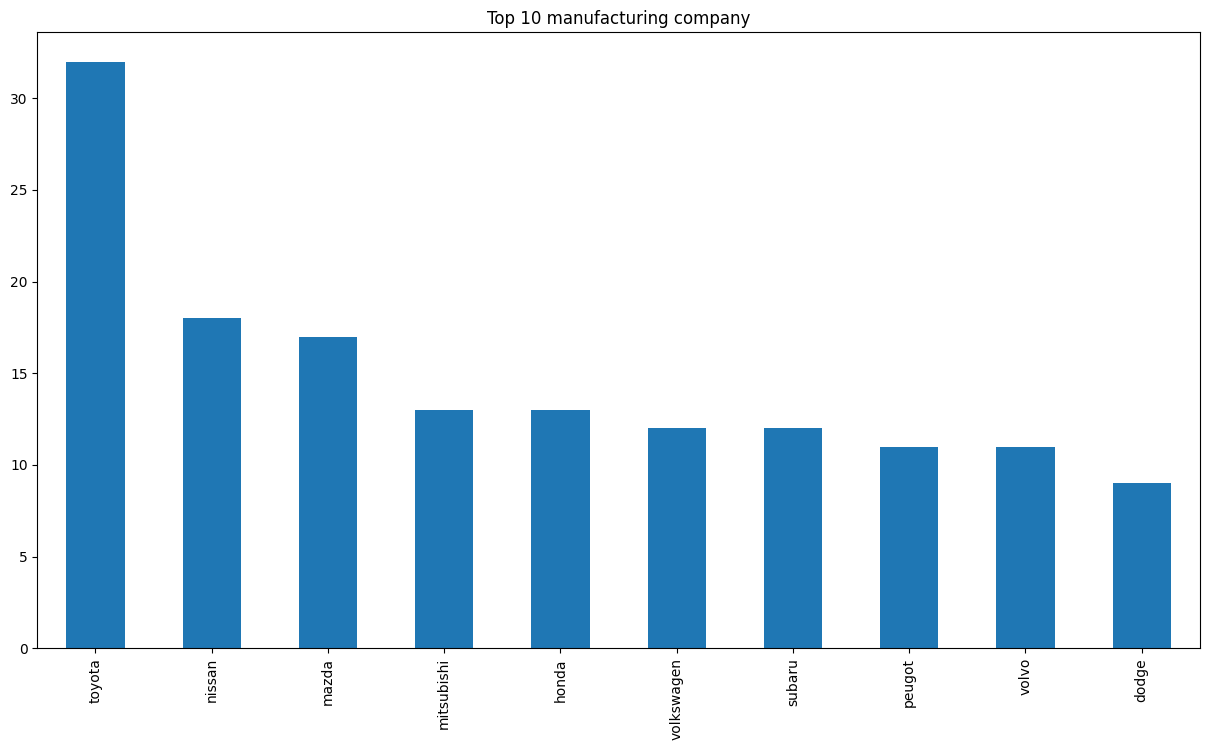

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
df["make"].value_counts().head(10).plot.bar(ax=ax)
plt.title("Top 10 manufacturing company");

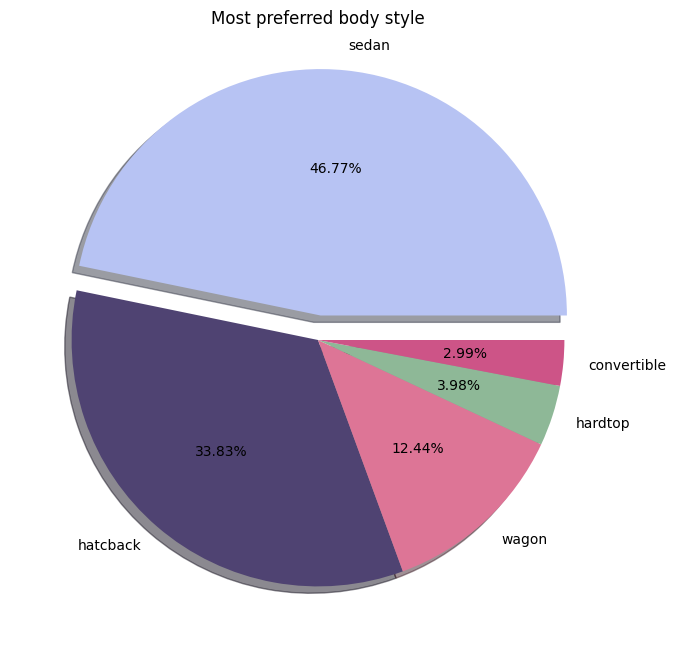

In [21]:
body = ['sedan', 'hatcback', 'wagon',
        'hardtop', 'convertible']
 
data = df["body-style"].value_counts()
explode = (0.1, 0.0, 0.0, 0.0, 0.0)
fig = plt.figure(figsize =(15, 8))
colors = ['#B7C3F3','#4F4372', '#DD7596', '#8EB897','#CD5487']
plt.pie(data, labels = body,explode=explode,autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Most preferred body style");


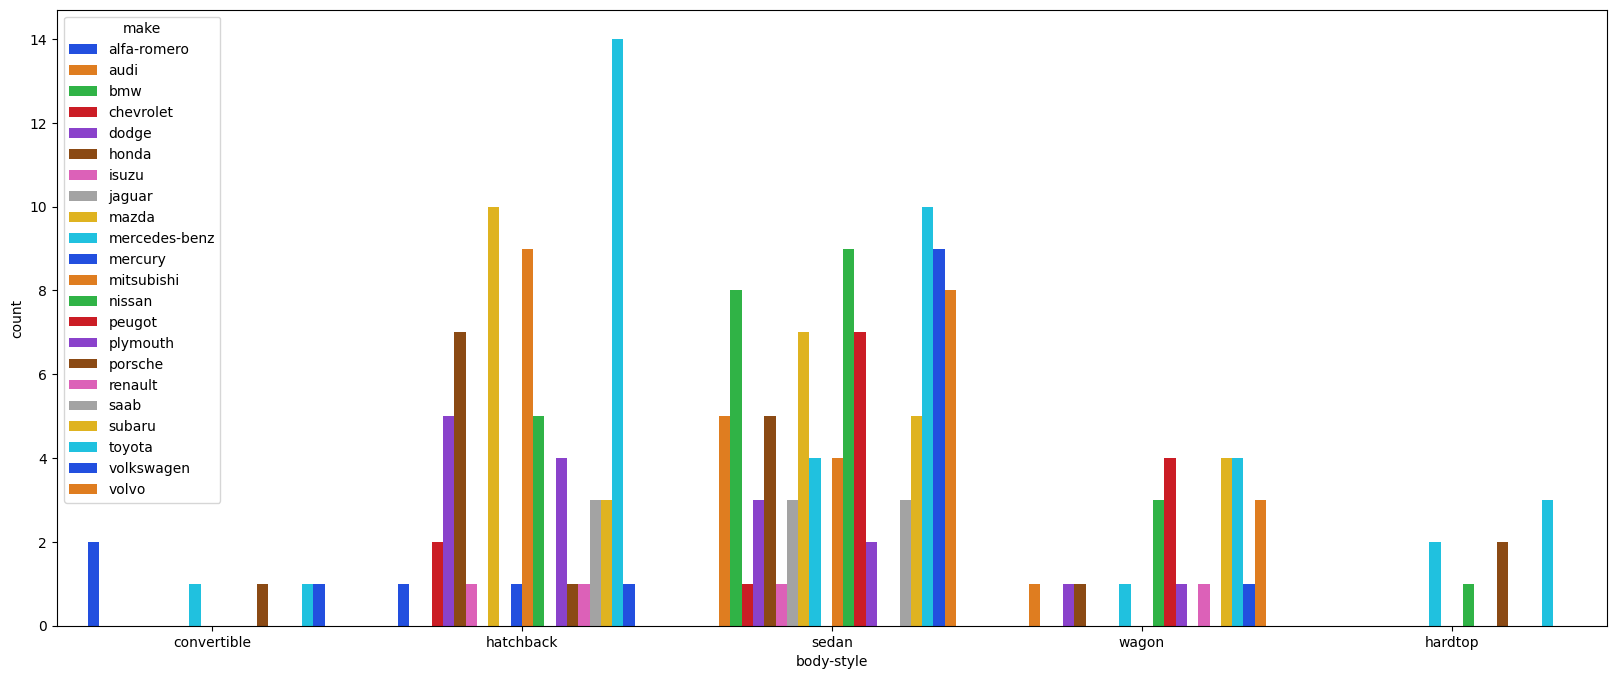

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='body-style', data=df, orient='h',hue='make',ax=ax,palette='bright');

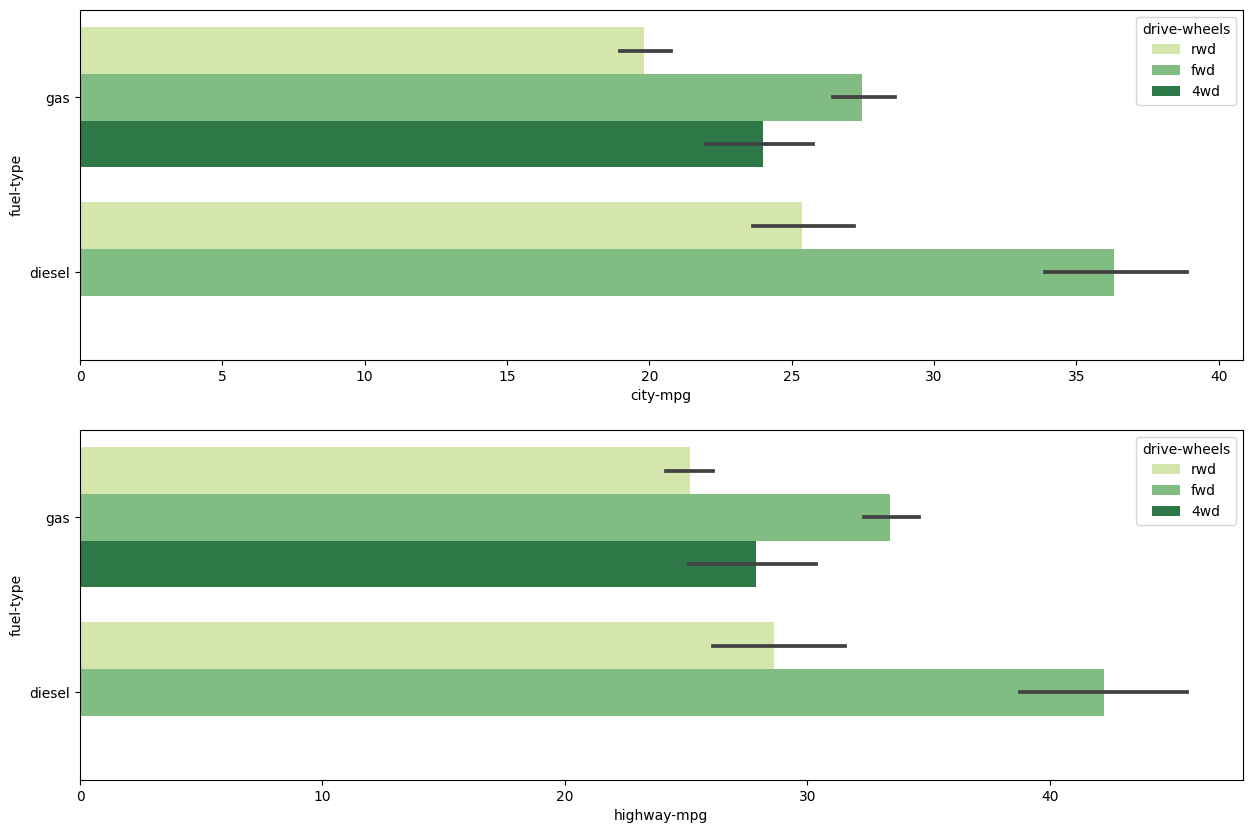

In [23]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))
sns.barplot(data=df, x="city-mpg", y="fuel-type",palette='YlGn',hue="drive-wheels",ax=ax1)
sns.barplot(data=df, x="highway-mpg", y="fuel-type",palette='YlGn',hue="drive-wheels",ax=ax2)
plt.show()

In [24]:
df["engine-type"]=df["engine-type"].replace(to_replace=["ohc","ohcf","ohcv","dohc","l","rotor"],value=["OverHead Cam","OverHead Cam and Valve F engine","OverHead Cam and Valve"
                                                                                                    ,"Dual OverHead Cam","L engine","Rotary engine"])

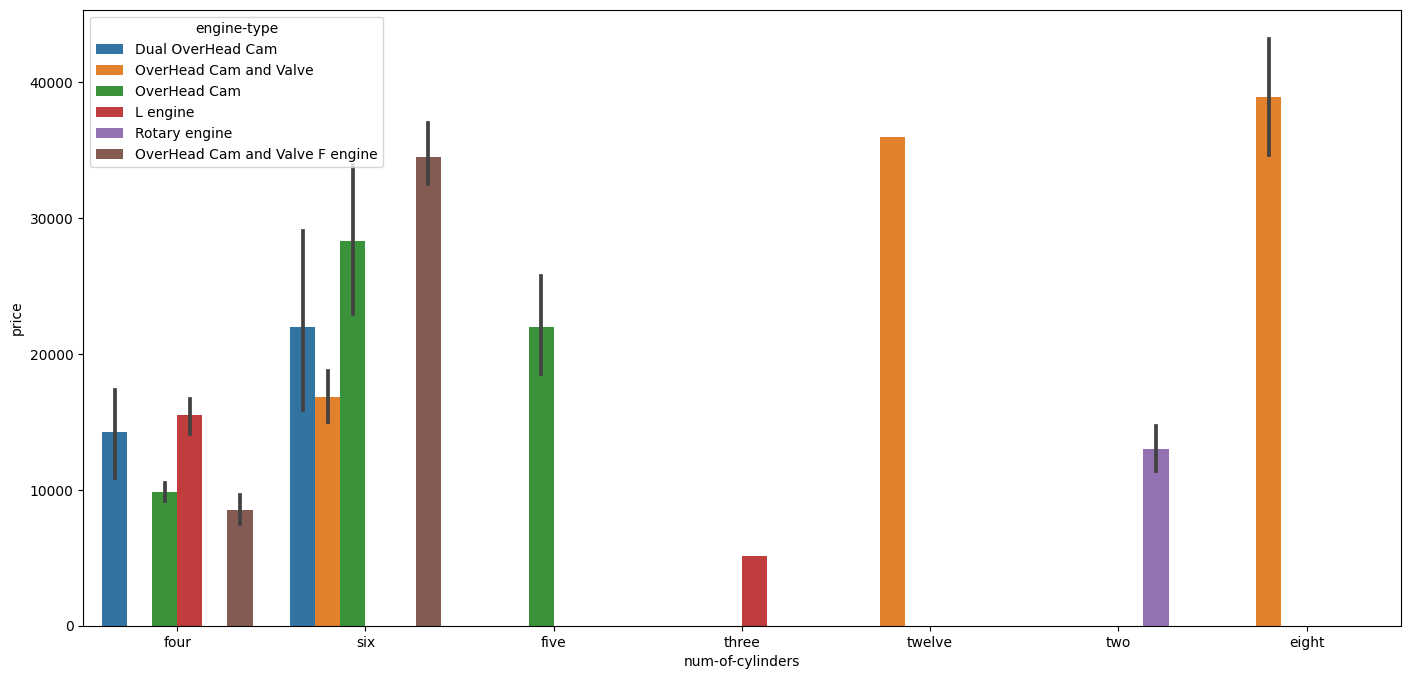

In [25]:
fig, ax = plt.subplots(figsize=(17,8))
sns.barplot(data=df,y="price",x='num-of-cylinders',hue="engine-type",ax=ax);

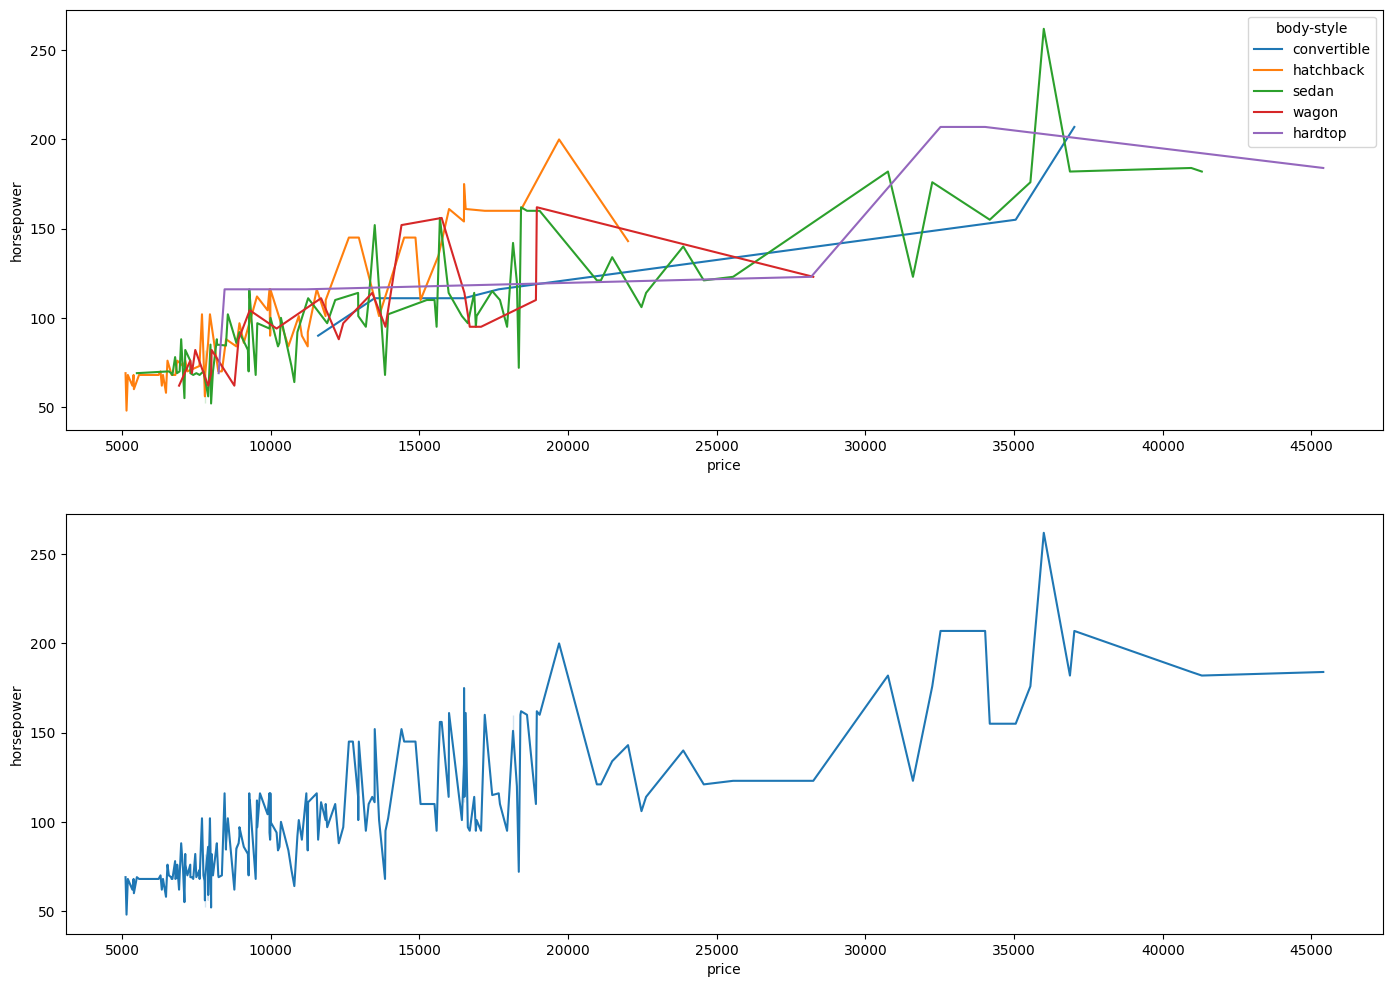

In [26]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(17,12))
sns.lineplot(x='price',y='horsepower',hue='body-style',data=df,ax=ax1)
sns.lineplot(x='price',y='horsepower',data=df,ax=ax2);

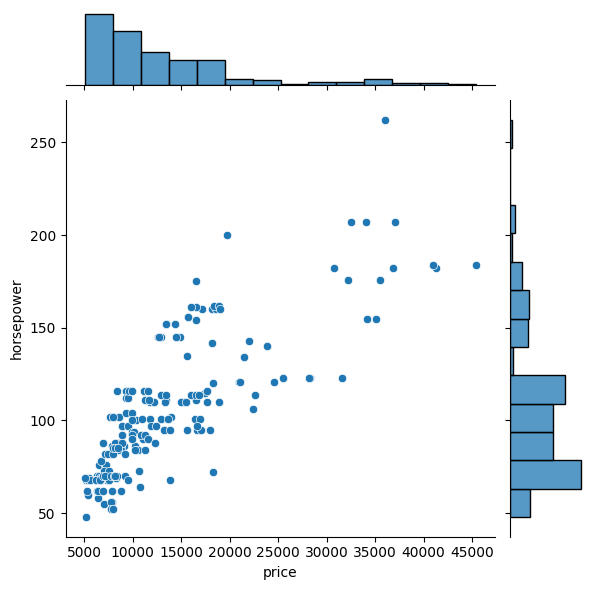

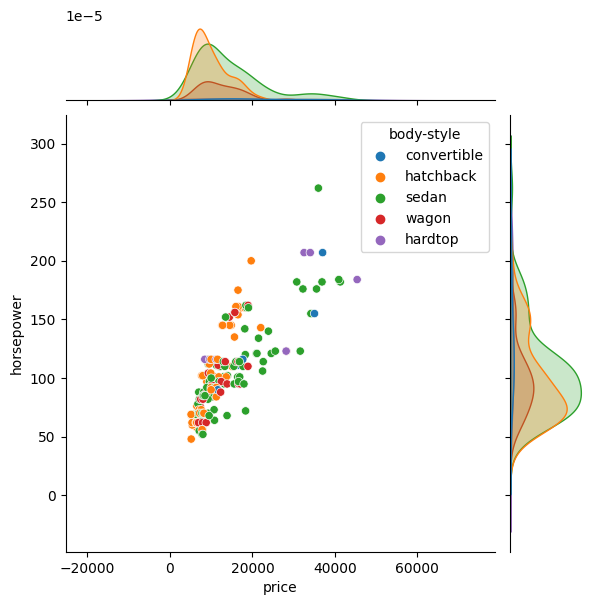

In [27]:
sns.jointplot(x='price', y='horsepower',data=df)
sns.jointplot(x='price', y='horsepower',
data=df, hue='body-style');

<ipython-input-33-f9e04c483058>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


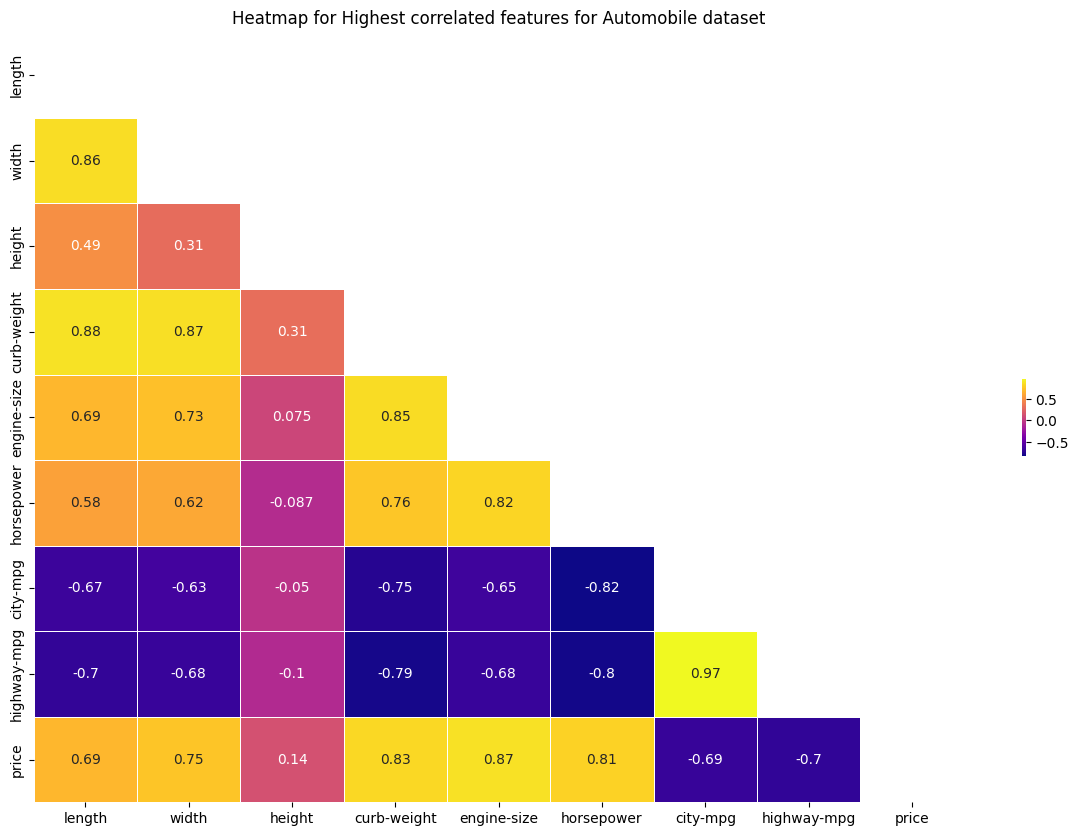

In [33]:
corr=df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap='plasma', annot=True, ax=ax,
mask=mask, cbar_kws={'shrink': 0.10},linewidths=.5)
plt.title("Heatmap for Highest correlated features for Automobile dataset");

<ipython-input-37-f9e04c483058>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


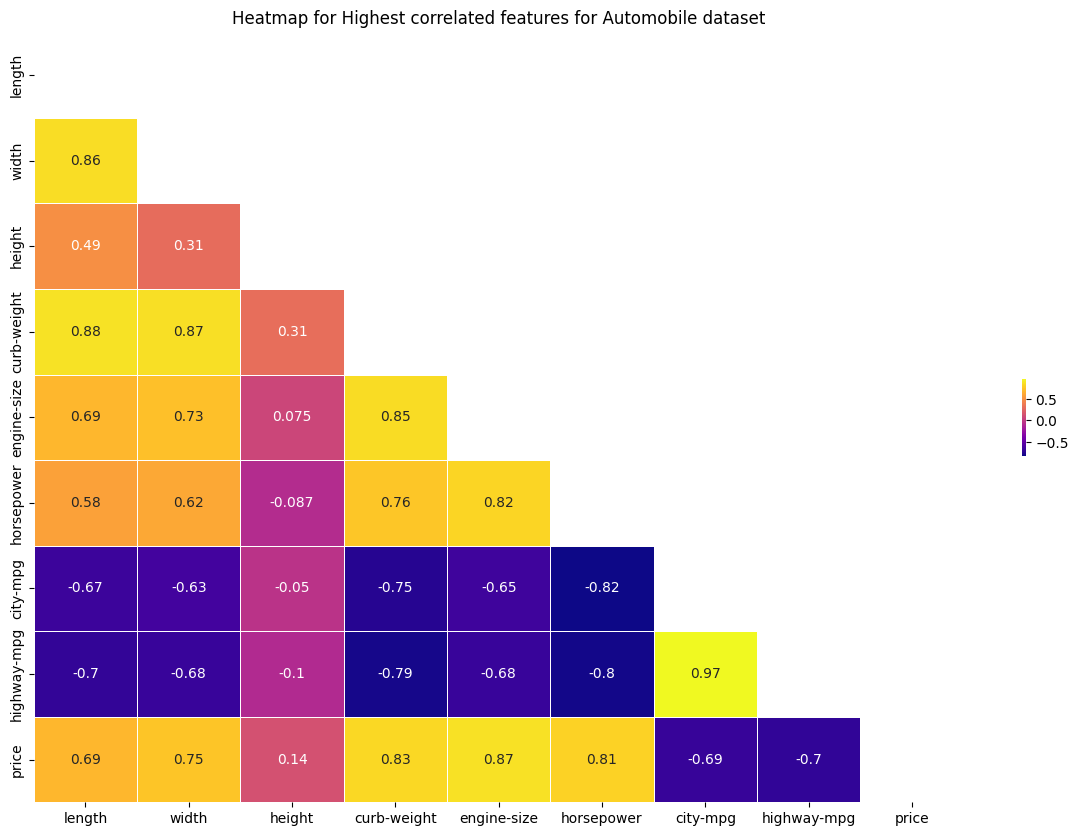

In [37]:
corr=df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap='plasma', annot=True, ax=ax,
mask=mask, cbar_kws={'shrink': 0.10},linewidths=.5)
plt.title("Heatmap for Highest correlated features for Automobile dataset");

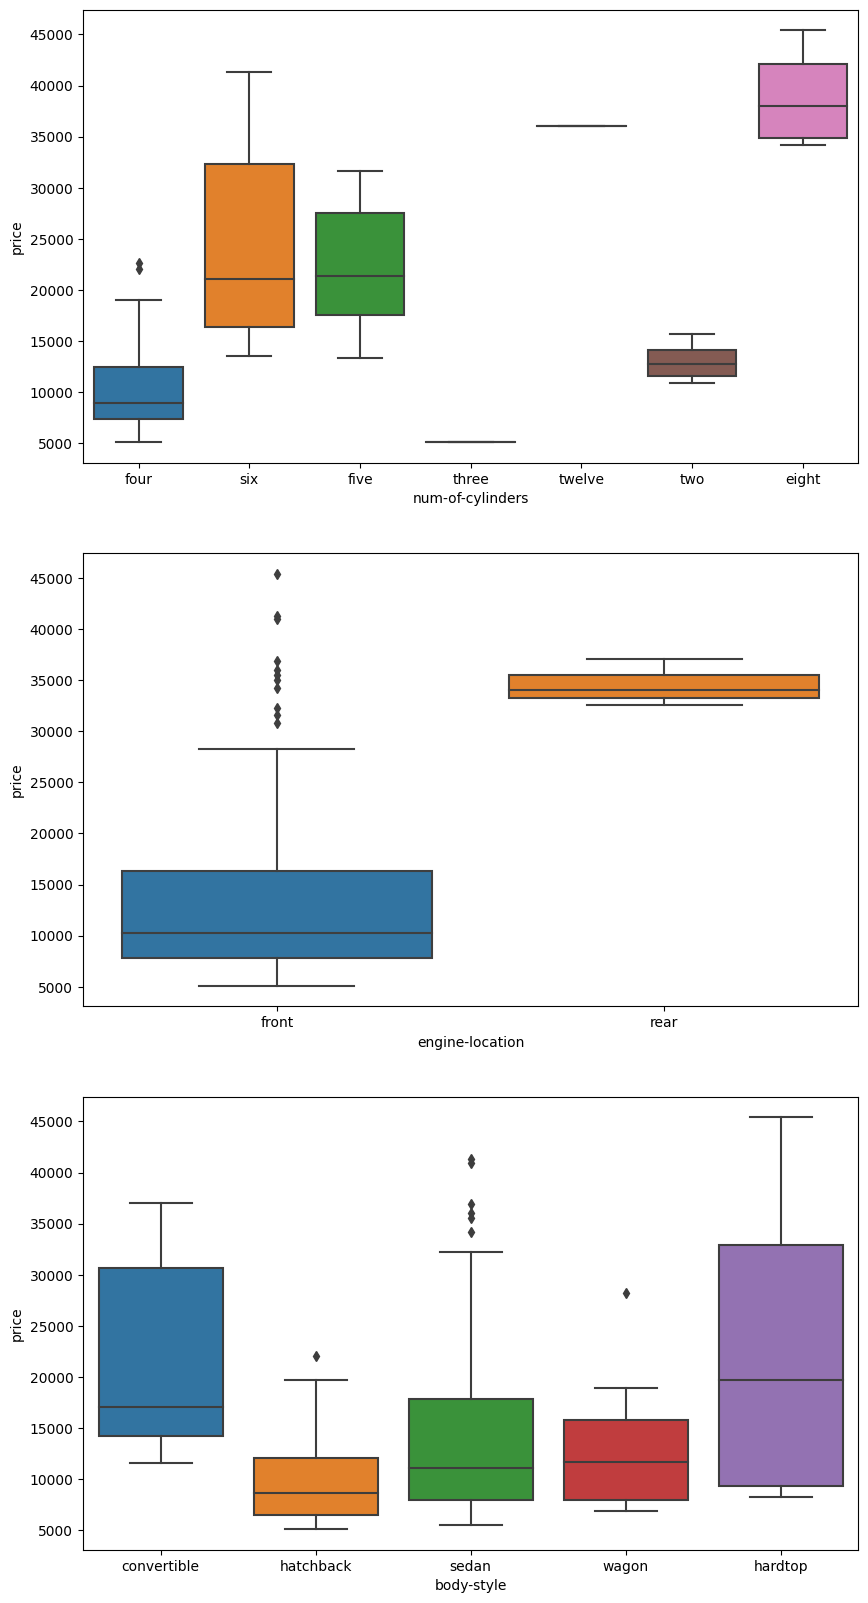

In [36]:
fig, [ax1, ax2,ax3] = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x="num-of-cylinders", y="price", data=df,ax=ax1)
sns.boxplot(x="engine-location", y="price", data=df,ax=ax2)
sns.boxplot(x="body-style", y="price", data=df,ax=ax3);
